In [2]:
import pandas as pd
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('../../Datasets/Assignment 3/Ages.csv')
images = pkl.load(open('../../Datasets/Assignment 3/Compressed_images/Compressed_data_age_1','rb')) 

In [ ]:
scaler = MinMaxScaler()
y = scaler.fit_transform(df['Age'].to_numpy().reshape(-1, 1))

In [ ]:
y

array([[0.86086957],
       [0.86086957],
       [0.86086957],
       ...,
       [0.06956522],
       [0.06956522],
       [0.06956522]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(images,y,random_state=32)

In [ ]:
y_test

array([[0.20869565],
       [0.2173913 ],
       [0.29565217],
       ...,
       [0.26086957],
       [0.33043478],
       [0.2173913 ]])

In [ ]:
def load_compile_model_age(input_shape=(3072,)):
    img_inputs_layer = keras.Input(shape=input_shape)

    hidden_layer = layers.Dense(64,activation='relu')(img_inputs_layer) 

    output = layers.Dense(1,bias_initializer='ones')(hidden_layer)

    # Create the model
    model = tf.keras.models.Model(inputs=img_inputs_layer, outputs=output)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

    return model

In [ ]:
age_model = load_compile_model_age()

In [ ]:
age_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_6 (Dense)             (None, 64)                196672    
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 196,737
Trainable params: 196,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
age_model.load_weights('model_checkpoint_age.h5')

In [ ]:
# Define the checkpoint path
checkpoint_path = "model_checkpoint_age.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

In [ ]:
history = age_model.fit(x=X_train,y=y_train,epochs=50,validation_split=0.1,verbose=2,callbacks=[checkpoint])

Epoch 1/50
501/501 - 1s - loss: 12.9859 - val_loss: 0.1047 - 1s/epoch - 3ms/step
Epoch 2/50
501/501 - 1s - loss: 0.0484 - val_loss: 0.0315 - 931ms/epoch - 2ms/step
Epoch 3/50
501/501 - 1s - loss: 0.0300 - val_loss: 0.0305 - 1s/epoch - 2ms/step
Epoch 4/50
501/501 - 1s - loss: 0.0298 - val_loss: 0.0304 - 959ms/epoch - 2ms/step
Epoch 5/50
501/501 - 1s - loss: 0.0298 - val_loss: 0.0304 - 1s/epoch - 2ms/step
Epoch 6/50
501/501 - 1s - loss: 0.0298 - val_loss: 0.0304 - 1s/epoch - 2ms/step
Epoch 7/50
501/501 - 1s - loss: 0.0298 - val_loss: 0.0304 - 997ms/epoch - 2ms/step
Epoch 8/50
501/501 - 1s - loss: 0.0298 - val_loss: 0.0305 - 888ms/epoch - 2ms/step
Epoch 9/50
501/501 - 1s - loss: 0.0298 - val_loss: 0.0304 - 892ms/epoch - 2ms/step
Epoch 10/50
501/501 - 1s - loss: 0.0298 - val_loss: 0.0306 - 990ms/epoch - 2ms/step
Epoch 11/50
501/501 - 1s - loss: 0.0298 - val_loss: 0.0305 - 904ms/epoch - 2ms/step
Epoch 12/50
501/501 - 1s - loss: 0.0298 - val_loss: 0.0304 - 930ms/epoch - 2ms/step
Epoch 13/50


In [12]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

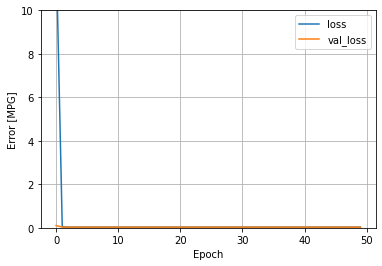

In [ ]:
plot_loss(history)

In [ ]:
y_pred = age_model.predict(X_test)

186/186 [==============================] - 0s 1ms/step


In [ ]:
mse = MSE(y_test,y_pred)
r2 = r2_score(y_test,y_pred) 

In [ ]:
print(f'Mean squared error test: {mse}')
print(f'R2 score: {r2}')

Mean squared error test: 0.030284395645602716
R2 score: -0.010304868084078711


<h1>Identity me vs not me</h1>

In [3]:
df = pd.read_csv('../../Assignment 1/task1/Data.csv')

In [4]:
file_name = '../../Assignment 1/task1/Compressed_data_1'
with open(file_name, 'rb') as handle:
    feature_matrix = pkl.load(handle)
print(feature_matrix.shape)

(61, 3072)


In [ ]:
X = feature_matrix
y = df['Identity']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=32)
y_train = np.array([1 if label == 'haziq' else 0 for label in y_train])
y_test = np.array([1 if label == 'haziq' else 0 for label in y_test])

In [ ]:
def load_compile_model_identity(input_shape=(3072,)):
    img_inputs_layer = keras.Input(shape=input_shape)

    hidden_layer = layers.Dense(64,activation='relu')(img_inputs_layer) 

    hidden_layer_2 = layers.Dense(64,activation='relu')(hidden_layer)
    
    output = layers.Dense(1,activation='sigmoid',bias_initializer='ones')(hidden_layer_2)


    # Create the model
    model = tf.keras.models.Model(inputs=img_inputs_layer, outputs=output)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

    return model

In [ ]:
identity_model = load_compile_model_identity()

In [ ]:
identity_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_8 (Dense)             (None, 64)                196672    
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 200,897
Trainable params: 200,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the checkpoint path
checkpoint_path = "model_checkpoint_id.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

In [ ]:
history_id = identity_model.fit(x=X_train,y=y_train,epochs=50,validation_split=0.1,verbose=2,callbacks=[checkpoint])

Epoch 1/50
2/2 - 1s - loss: 2.1308 - accuracy: 0.4186 - val_loss: 7.6657 - val_accuracy: 0.6000 - 575ms/epoch - 288ms/step
Epoch 2/50
2/2 - 0s - loss: 8.2315 - accuracy: 0.4884 - val_loss: 0.4599 - val_accuracy: 0.6000 - 50ms/epoch - 25ms/step
Epoch 3/50
2/2 - 0s - loss: 1.1142 - accuracy: 0.5581 - val_loss: 4.7981 - val_accuracy: 0.4000 - 30ms/epoch - 15ms/step
Epoch 4/50
2/2 - 0s - loss: 3.1990 - accuracy: 0.5116 - val_loss: 1.3816 - val_accuracy: 0.6000 - 30ms/epoch - 15ms/step
Epoch 5/50
2/2 - 0s - loss: 1.8560 - accuracy: 0.4884 - val_loss: 0.9704 - val_accuracy: 0.6000 - 29ms/epoch - 15ms/step
Epoch 6/50
2/2 - 0s - loss: 1.0026 - accuracy: 0.6047 - val_loss: 0.2634 - val_accuracy: 0.8000 - 49ms/epoch - 25ms/step
Epoch 7/50
2/2 - 0s - loss: 0.6751 - accuracy: 0.8140 - val_loss: 0.4349 - val_accuracy: 0.8000 - 31ms/epoch - 15ms/step
Epoch 8/50
2/2 - 0s - loss: 0.5435 - accuracy: 0.8372 - val_loss: 0.0033 - val_accuracy: 1.0000 - 50ms/epoch - 25ms/step
Epoch 9/50
2/2 - 0s - loss: 0.

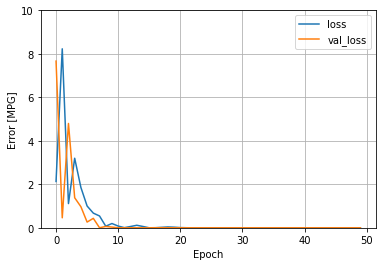

In [ ]:
plot_loss(history_id)

In [ ]:
y_pred = identity_model.predict(X_test)
y_pred = y_pred.round()

1/1 [==============================] - 0s 21ms/step


Accuracy: 1.0
Classwise Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13


Confusion Matrix: 


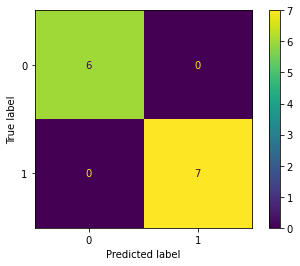

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classwise Classification Report: \n{classification_report(y_test, y_pred)}")
con_matrix = confusion_matrix(np.ravel(y_test), y_pred)
print("\nConfusion Matrix: ")
con_matrix = ConfusionMatrixDisplay(con_matrix)
con_matrix.plot()
plt.show()

<h1 style='text-align:center'>Emotions</h1>

In [22]:
def load_compile_model_emotions(input_shape=(3072,)):
    img_inputs_layer = keras.Input(shape=input_shape)

    hidden_layer = layers.Dense(128,activation='relu')(img_inputs_layer) 

    hidden_layer_2 = layers.Dense(64,activation='relu')(hidden_layer)
    
    
    output = layers.Dense(1,activation='sigmoid',bias_initializer='ones')(hidden_layer_2)


    # Create the model
    model = tf.keras.models.Model(inputs=img_inputs_layer, outputs=output)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

    return model


In [23]:
X = feature_matrix
y = df['Facial Expression']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=32)

In [25]:
em_model = load_compile_model_emotions()
em_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_7 (Dense)             (None, 128)               393344    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 401,665
Trainable params: 401,665
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Define the checkpoint path
checkpoint_path = "model_checkpoint_em.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

In [27]:
history_em = em_model.fit(x=X_train,y=y_train,epochs=50,validation_split=0.1,verbose=2,callbacks=[checkpoint])


Epoch 1/50
2/2 - 0s - loss: 4.7712 - accuracy: 0.5349 - val_loss: 8.1948 - val_accuracy: 0.4000 - 500ms/epoch - 250ms/step
Epoch 2/50
2/2 - 0s - loss: 6.4441 - accuracy: 0.5116 - val_loss: 7.4631 - val_accuracy: 0.6000 - 62ms/epoch - 31ms/step
Epoch 3/50
2/2 - 0s - loss: 8.2296 - accuracy: 0.4884 - val_loss: 2.0480 - val_accuracy: 0.6000 - 56ms/epoch - 28ms/step
Epoch 4/50
2/2 - 0s - loss: 3.1958 - accuracy: 0.4651 - val_loss: 7.7601 - val_accuracy: 0.4000 - 39ms/epoch - 19ms/step
Epoch 5/50
2/2 - 0s - loss: 6.7170 - accuracy: 0.5116 - val_loss: 3.0145 - val_accuracy: 0.4000 - 33ms/epoch - 16ms/step
Epoch 6/50
2/2 - 0s - loss: 2.0051 - accuracy: 0.5349 - val_loss: 1.9528 - val_accuracy: 0.6000 - 64ms/epoch - 32ms/step
Epoch 7/50
2/2 - 0s - loss: 1.9771 - accuracy: 0.4884 - val_loss: 1.4261 - val_accuracy: 0.6000 - 61ms/epoch - 30ms/step
Epoch 8/50
2/2 - 0s - loss: 1.0859 - accuracy: 0.5349 - val_loss: 1.7610 - val_accuracy: 0.4000 - 33ms/epoch - 16ms/step
Epoch 9/50
2/2 - 0s - loss: 1.

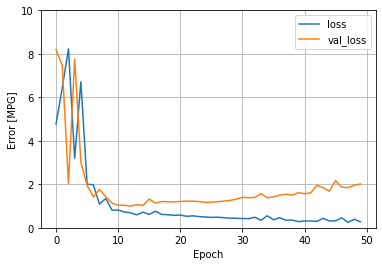

In [28]:
plot_loss(history_em)

In [29]:
y_pred = em_model.predict(X_test)
y_pred = y_pred.round()

1/1 [==============================] - 0s 44ms/step


Accuracy: 0.46153846153846156
Classwise Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.44      0.67      0.53         6

    accuracy                           0.46        13
   macro avg       0.47      0.48      0.45        13
weighted avg       0.47      0.46      0.44        13


Confusion Matrix: 


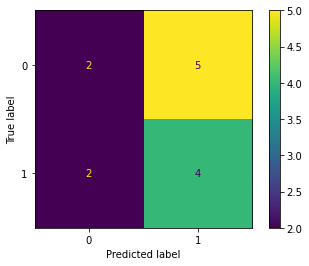

In [30]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classwise Classification Report: \n{classification_report(y_test, y_pred)}")
con_matrix = confusion_matrix(np.ravel(y_test), y_pred)
print("\nConfusion Matrix: ")
con_matrix = ConfusionMatrixDisplay(con_matrix)
con_matrix.plot()
plt.show()